# Assignment 8
Using any dataset that has a categorical feature that needs to be predicted, use several algorithms, preprocessing techniques, feature extraction techniques to fit the data to the model and show the accuracy, confusion matrix, and the classification report. G
https://www.kaggle.com/ntnu-testimon/paysim1
https://www.kaggle.com/joniarroba/noshowappointments
https://archive.ics.uci.edu/ml/datasets.html?format=&task=cla&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
https://archive.ics.uci.edu/ml/datasets/Adult

In [12]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5)
import numpy as np

from pylab import rcParams
rcParams['figure.figsize'] = 20, 10


from sklearn.linear_model import LogisticRegression as Model

In [13]:
# Read in the Adult data [https://archive.ics.uci.edu/ml/datasets/Adult]

In [15]:
adult = pd.read_csv('../data/adult_data.csv')
adult

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hpw,native_country,salary_50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [16]:
from sklearn.svm import LinearSVC

In [17]:
adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hpw', 'native_country', 'salary_50K'],
      dtype='object')

In [19]:
adult.groupby(adult.salary_50K).count()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hpw,native_country
salary_50K,,,,,,,,,,,,,,
<=50K,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720
>50K,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841


In [20]:
adult.iloc[0]

age                           39
workclass              State-gov
fnlwgt                     77516
education              Bachelors
education_num                 13
marital_status     Never-married
occupation          Adm-clerical
relationship       Not-in-family
race                       White
sex                         Male
capital_gain                2174
capital_loss                   0
hpw                           40
native_country     United-States
salary_50K                 <=50K
Name: 0, dtype: object

In [22]:
df = pd.DataFrame(data=adult)
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hpw,native_country,salary_50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [23]:
df['workclass_num']= df['workclass']
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hpw,native_country,salary_50K,workclass_num
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,State-gov
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Self-emp-not-inc
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Private
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Private
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Private
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,Private
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,Private
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,Self-emp-not-inc
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,Private
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,Private


In [24]:
df['ms_num']= df['marital_status']
df['occupation_num']= df['occupation']
df['rel_num']= df['relationship']
df['race_num']= df['race']
df['sex_num']= df['sex']
df['nc_num']= df['native_country']
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,hpw,native_country,salary_50K,workclass_num,ms_num,occupation_num,rel_num,race_num,sex_num,nc_num
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,40,United-States,<=50K,State-gov,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,13,United-States,<=50K,Self-emp-not-inc,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,40,United-States,<=50K,Private,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,40,United-States,<=50K,Private,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,40,Cuba,<=50K,Private,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,...,40,United-States,<=50K,Private,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,...,16,Jamaica,<=50K,Private,Married-spouse-absent,Other-service,Not-in-family,Black,Female,Jamaica
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,45,United-States,>50K,Self-emp-not-inc,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,...,50,United-States,>50K,Private,Never-married,Prof-specialty,Not-in-family,White,Female,United-States
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,40,United-States,>50K,Private,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States


In [26]:
df_with_dummies = pd.get_dummies(df, prefix='workclass_num', columns=['workclass_num'])

In [27]:
df_with_dummies 

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,nc_num,workclass_num_ ?,workclass_num_ Federal-gov,workclass_num_ Local-gov,workclass_num_ Never-worked,workclass_num_ Private,workclass_num_ Self-emp-inc,workclass_num_ Self-emp-not-inc,workclass_num_ State-gov,workclass_num_ Without-pay
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,United-States,0,0,0,0,0,0,0,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,United-States,0,0,0,0,0,0,1,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,United-States,0,0,0,0,1,0,0,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,United-States,0,0,0,0,1,0,0,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,Cuba,0,0,0,0,1,0,0,0,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,...,United-States,0,0,0,0,1,0,0,0,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,...,Jamaica,0,0,0,0,1,0,0,0,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,United-States,0,0,0,0,0,0,1,0,0
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,...,United-States,0,0,0,0,1,0,0,0,0
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,United-States,0,0,0,0,1,0,0,0,0


In [28]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,hpw,native_country,salary_50K,workclass_num,ms_num,occupation_num,rel_num,race_num,sex_num,nc_num
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,40,United-States,<=50K,State-gov,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,13,United-States,<=50K,Self-emp-not-inc,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,40,United-States,<=50K,Private,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,40,United-States,<=50K,Private,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,40,Cuba,<=50K,Private,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,...,40,United-States,<=50K,Private,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,...,16,Jamaica,<=50K,Private,Married-spouse-absent,Other-service,Not-in-family,Black,Female,Jamaica
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,45,United-States,>50K,Self-emp-not-inc,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,...,50,United-States,>50K,Private,Never-married,Prof-specialty,Not-in-family,White,Female,United-States
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,40,United-States,>50K,Private,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States


In [34]:
dummy = [1 if '-gov' in adult.workclass_num else 0 for adult.workclass_num in adult]

In [35]:
dummy

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
#workclass_num 1=government employee; 0=non government employee or out of work
#ms_num 1=married; 0= single
#rel_num 1=husband or wife; 0=not-in-family, unmarried, other-relative, own-child
#race_num 1=white; 0=black, asian-pacislander, amer-indian-eskimo, other
#sex_num 1=female; 0=male
#nc_num 1=united state; 0= all other countries and unknowns
#edu_num 1="years/grades" 13 to 16; 0="years/grades" 1 to 12
#salary_num 1= >=50K; 0= <=50K

In [49]:
adult = pd.read_csv('../data/adult_data_dummy.csv')
adult

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,native_country,salary_50K,workclass_num,ms_num,rel_num,race_num,sex_num,nc_num,edu_num,salary_num
0,62,Private,416829,11th,7,Separated,Other-service,Not-in-family,Black,Female,...,United-States,<=50K,0,0,0,0,1,1,0,0
1,25,Private,197728,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,...,United-States,<=50K,0,0,0,1,1,1,0,0
2,47,Self-emp-not-inc,229394,11th,7,Divorced,Exec-managerial,Unmarried,White,Female,...,United-States,<=50K,0,0,0,1,1,1,0,0
3,36,Private,177285,Assoc-voc,11,Never-married,Prof-specialty,Unmarried,Black,Female,...,United-States,<=50K,0,0,0,0,1,1,0,0
4,47,Private,97419,HS-grad,9,Married-civ-spouse,Protective-serv,Wife,Black,Female,...,United-States,<=50K,0,1,1,0,1,1,0,0
5,57,Private,173580,Some-college,10,Widowed,Machine-op-inspct,Unmarried,White,Female,...,United-States,<=50K,0,0,0,1,1,1,0,0
6,32,Federal-gov,504951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,...,United-States,<=50K,1,1,1,1,0,1,0,0
7,31,Private,288419,10th,6,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,...,United-States,<=50K,0,1,1,1,0,1,0,0
8,39,Private,154641,Assoc-voc,11,Married-civ-spouse,Adm-clerical,Husband,White,Male,...,United-States,<=50K,0,1,1,1,0,1,0,0
9,39,Private,147258,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,...,United-States,<=50K,0,1,1,1,0,1,0,0


In [50]:
adult.edu_num.value_counts(normalize=True)

0    0.75225
1    0.24775
Name: edu_num, dtype: float64

In [51]:
adult.edu_num.value_counts(normalize=False)

0    24494
1     8067
Name: edu_num, dtype: int64

In [54]:
adult.salary_num.value_counts(normalize=True)

0    0.75919
1    0.24081
Name: salary_num, dtype: float64

In [55]:
adult.salary_num.value_counts(normalize=False)

0    24720
1     7841
Name: salary_num, dtype: int64

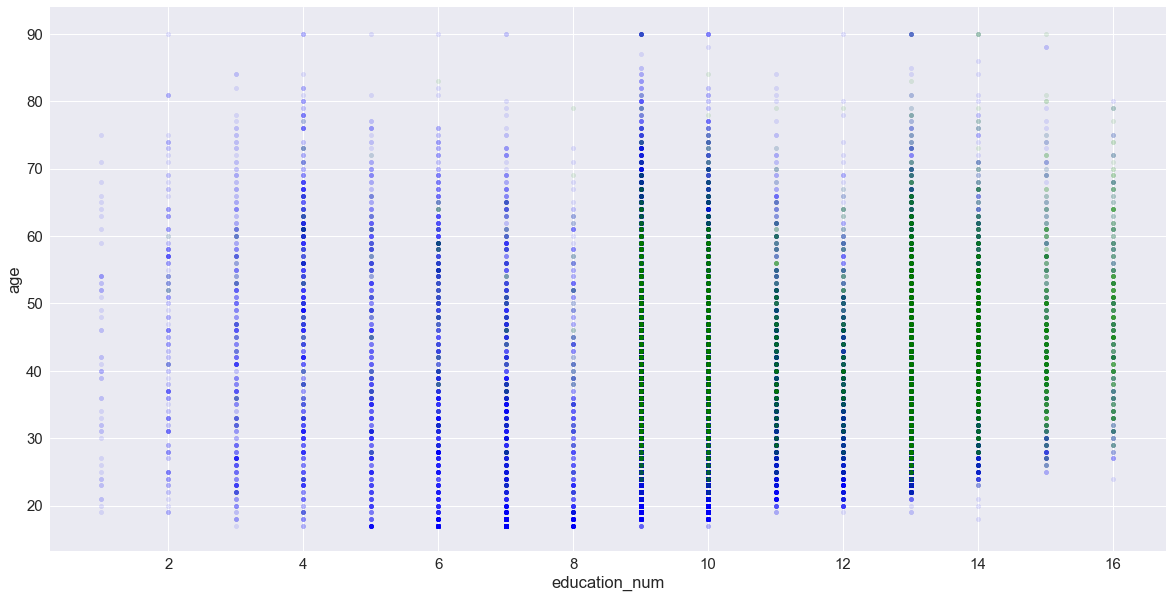

In [57]:
fig, ax = plt.subplots()
adult[adult.salary_num==0].plot(kind='scatter', x='education_num', y='age', color='blue', alpha=0.1, ax=ax)
adult[adult.salary_num==1].plot(kind='scatter', x='education_num', y='age', color='green', alpha=0.1, ax=ax)
# plt.scatter(adult.education_num, adult.age, alpha=0.2)

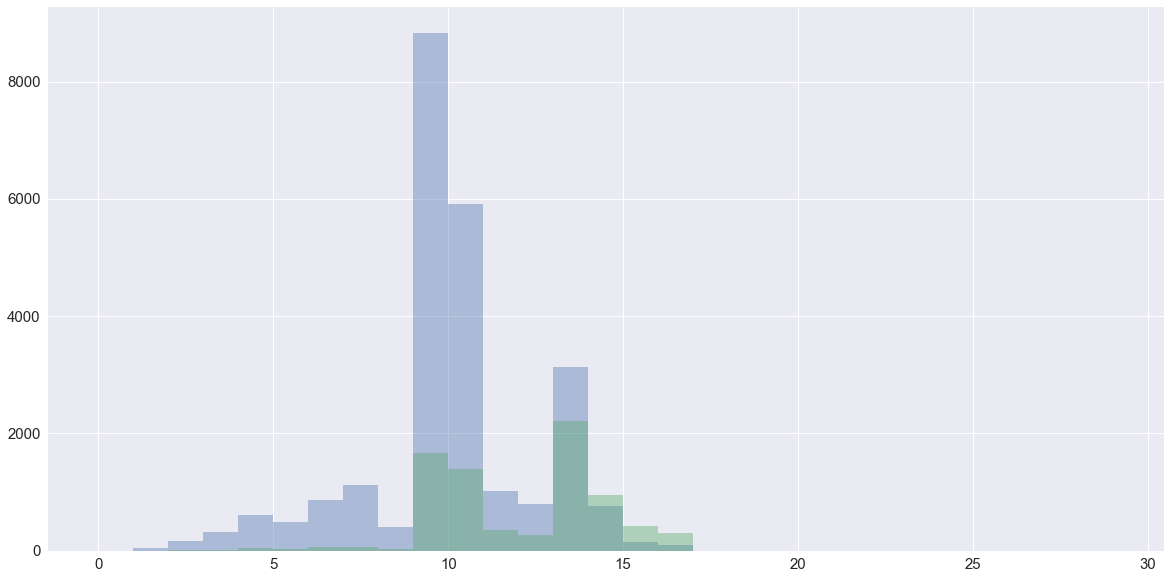

In [64]:
adult[adult.salary_num==0].education_num.hist(bins=np.arange(0,30,1), alpha=.4)
adult[adult.salary_num==1].education_num.hist(bins=np.arange(0,30,1), alpha=.4)

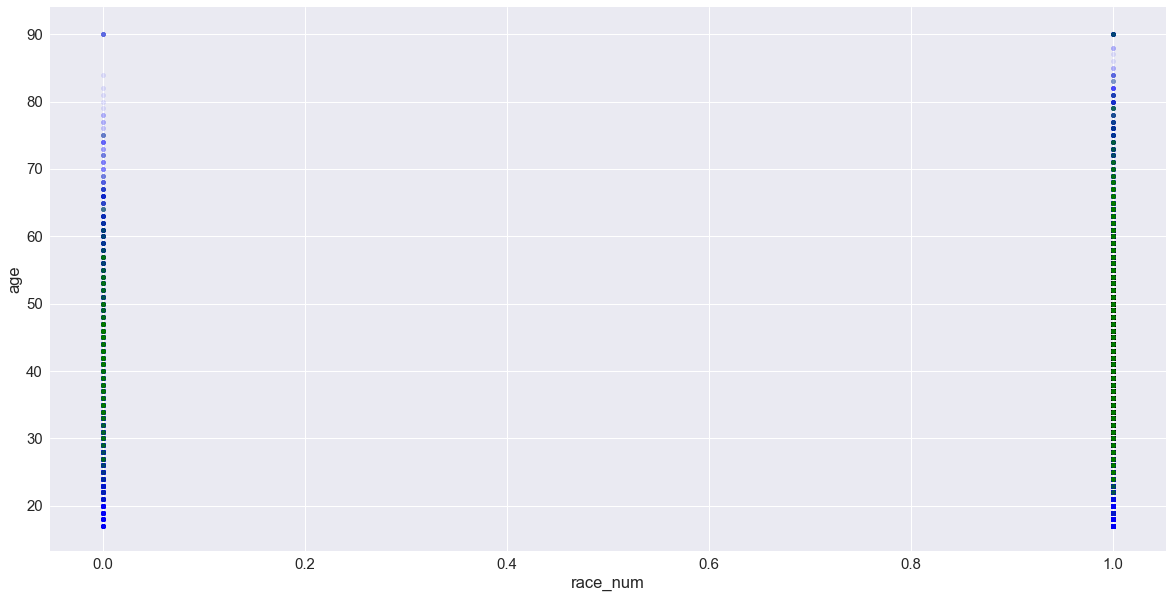

In [59]:
fig, ax = plt.subplots()
adult[adult.salary_num==0].plot(kind='scatter', x='race_num', y='age', color='blue', alpha=0.1, ax=ax)
adult[adult.salary_num==1].plot(kind='scatter', x='race_num', y='age', color='green', alpha=0.1, ax=ax)
# plt.scatter(adult.race_num, adult.age, alpha=0.2)

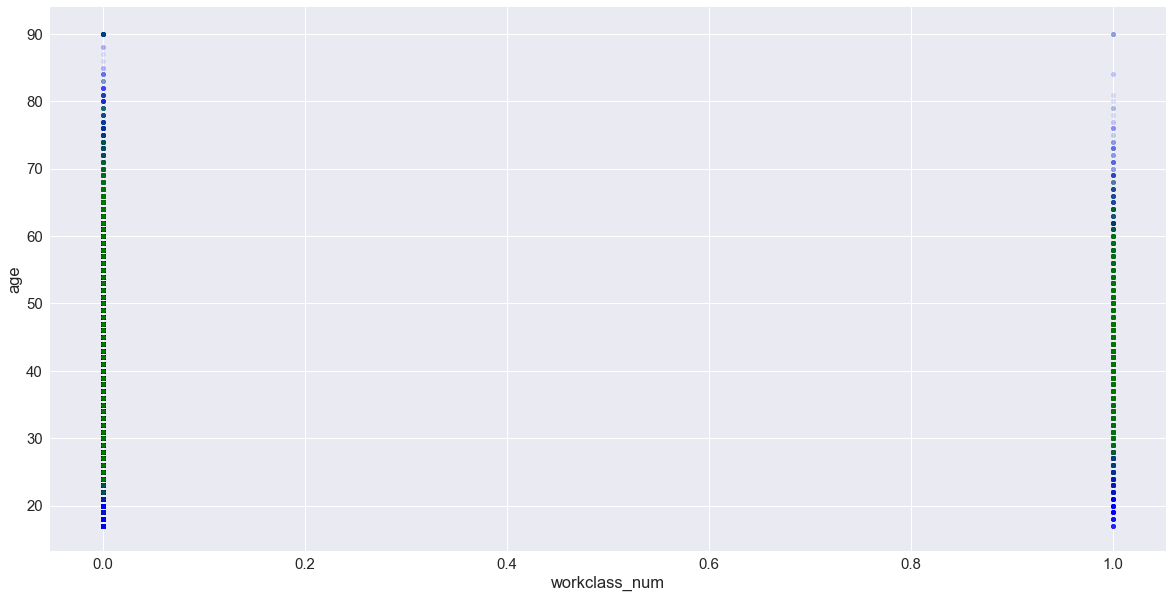

In [60]:
fig, ax = plt.subplots()
adult[adult.salary_num==0].plot(kind='scatter', x='workclass_num', y='age', color='blue', alpha=0.1, ax=ax)
adult[adult.salary_num==1].plot(kind='scatter', x='workclass_num', y='age', color='green', alpha=0.1, ax=ax)
# plt.scatter(adult.workclass_num, adult.age, alpha=0.2)

In [65]:
# fit a linear regression model and store the predictions
feature_cols = ['salary_num', 'edu_num', 'workclass_num', 'sex_num', 'rel_num', 'ms_num', 'nc_num']
X = adult[feature_cols]
y = adult.age

model = Model()
model.fit(X, y)
adult['pred'] = model.predict(X)


from sklearn.metrics import accuracy_score
accuracy_score(adult.age, adult.pred.round())

0.044347532323945824

In [72]:
adult

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,salary_50K,workclass_num,ms_num,rel_num,race_num,sex_num,nc_num,edu_num,salary_num,pred
0,62,Private,416829,11th,7,Separated,Other-service,Not-in-family,Black,Female,...,<=50K,0,0,0,0,1,1,0,0,20
1,25,Private,197728,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,...,<=50K,0,0,0,1,1,1,0,0,20
2,47,Self-emp-not-inc,229394,11th,7,Divorced,Exec-managerial,Unmarried,White,Female,...,<=50K,0,0,0,1,1,1,0,0,20
3,36,Private,177285,Assoc-voc,11,Never-married,Prof-specialty,Unmarried,Black,Female,...,<=50K,0,0,0,0,1,1,0,0,20
4,47,Private,97419,HS-grad,9,Married-civ-spouse,Protective-serv,Wife,Black,Female,...,<=50K,0,1,1,0,1,1,0,0,36
5,57,Private,173580,Some-college,10,Widowed,Machine-op-inspct,Unmarried,White,Female,...,<=50K,0,0,0,1,1,1,0,0,20
6,32,Federal-gov,504951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,...,<=50K,1,1,1,1,0,1,0,0,43
7,31,Private,288419,10th,6,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,...,<=50K,0,1,1,1,0,1,0,0,35
8,39,Private,154641,Assoc-voc,11,Married-civ-spouse,Adm-clerical,Husband,White,Male,...,<=50K,0,1,1,1,0,1,0,0,35
9,39,Private,147258,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,...,<=50K,0,1,1,1,0,1,0,0,35


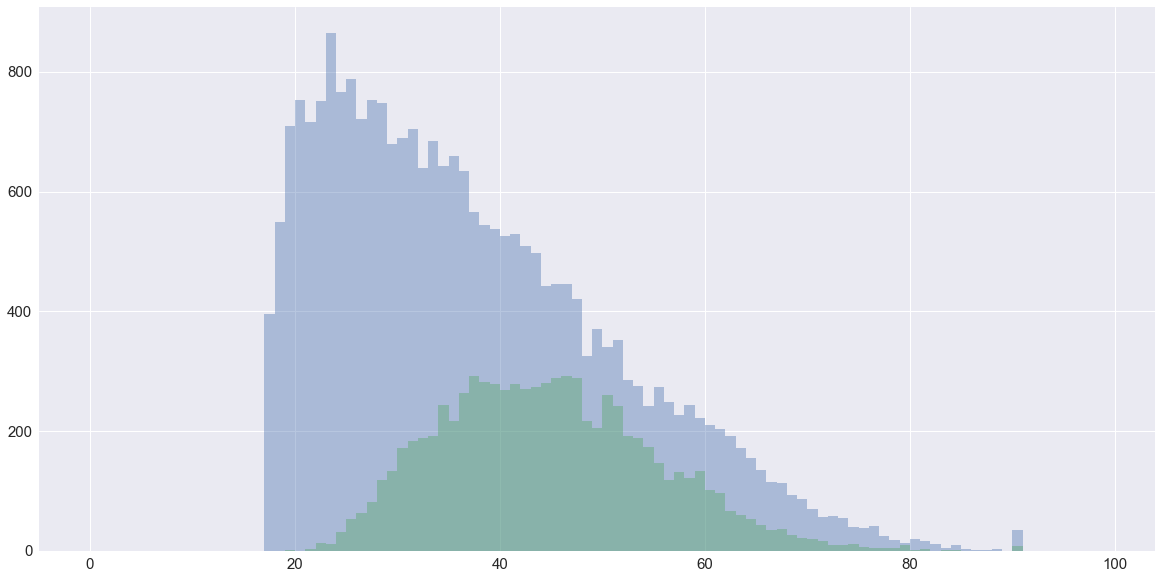

In [67]:
adult[adult.salary_num==0].age.hist(bins=np.arange(0,100,1), alpha=.4)
adult[adult.salary_num==1].age.hist(bins=np.arange(0,100,1), alpha=.4)

In [77]:
adult[(adult.pred==0) & adult[adult.salary_num==0].age.hist(bins=np.arange(0,100,1), alpha=.4)
adult[(adult.pred==20) & adult[adult.salary_num==1].age.hist(bins=np.arange(0,100,1), alpha=.4)

SyntaxError: invalid syntax (<ipython-input-77-b709bebf9846>, line 2)

In [81]:
# fit a linear regression model and store the predictions
feature_cols = ['salary_num', 'edu_num', 'workclass_num', 'sex_num', 'rel_num', 'ms_num', 'nc_num']
X = adult[feature_cols]
y = adult.age

model = Model()
model.fit(X, y)
adult['pred'] = model.predict(X)


from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(adult.age, adult.pred.round())
confusion_matrix(adult.age, adult.pred.round())


array([[  0,   0, 114, ...,   0,   0,   0],
       [  0,   0, 141, ...,   0,   0,   0],
       [  0,   0, 175, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   1, ...,   0,   0,   0],
       [  0,   0,   7, ...,   0,   0,   0]], dtype=int64)

In [82]:
[[num of correct miss pred] [num of inc miss pred]]

SyntaxError: invalid syntax (<ipython-input-82-8531411831fc>, line 1)

In [88]:
from sklearn.metrics import classification_report
print(classification_report(adult.age, adult.pred.round()))

             precision    recall  f1-score   support

         17       0.00      0.00      0.00       395
         18       0.00      0.00      0.00       550
         19       0.06      0.25      0.10       712
         20       0.04      0.28      0.08       753
         21       0.00      0.00      0.00       720
         22       0.00      0.00      0.00       765
         23       0.05      0.48      0.09       877
         24       0.00      0.00      0.00       798
         25       0.06      0.01      0.02       841
         26       0.00      0.00      0.00       785
         27       0.00      0.00      0.00       835
         28       0.05      0.02      0.02       867
         29       0.00      0.00      0.00       813
         30       0.04      0.01      0.02       861
         31       0.04      0.06      0.05       888
         32       0.00      0.00      0.00       828
         33       0.03      0.02      0.02       875
         34       0.00      0.00      0.00   

C:\Users\Erin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [89]:
model.coef_

array([[-2.49348757e+00,  3.53084329e-01, -1.12169513e+00,
        -2.46632869e-01, -2.04133886e+00, -2.33650510e+00,
         5.16716516e-01],
       [-2.76530317e+00,  3.35983392e-01, -1.22412472e+00,
        -1.66556281e-01, -1.99139281e+00, -1.83833529e+00,
         6.88736992e-01],
       [-2.57382149e+00,  3.09780780e-01, -9.73564952e-01,
        -9.40877424e-02, -2.11335913e+00, -1.24742152e+00,
         3.03289200e-01],
       [-3.16140407e+00, -1.85050830e-02, -8.89862599e-01,
        -1.07520080e-01, -2.06906276e+00, -5.66202313e-01,
         1.93215646e-01],
       [-2.70932997e+00,  6.53736918e-02, -8.29757610e-01,
        -1.70297156e-01, -1.22465742e+00, -8.53598666e-01,
         5.52388520e-02],
       [-1.90284765e+00,  2.94114042e-02, -4.78008878e-01,
        -1.76133348e-01, -1.35026342e+00, -4.86710207e-01,
        -5.62235661e-02],
       [-2.21426085e+00,  1.10770009e-01, -3.56314849e-01,
        -3.20712793e-01, -1.07991148e+00, -5.68016255e-01,
        -1.8437212

In [90]:
model.predict(X)

array([20, 20, 20, ..., 45, 37, 37], dtype=int64)

In [87]:
X

,salary_num,edu_num,workclass_num,sex_num,rel_num,ms_num,nc_num
0,0,0,0,1,0,0,1
1,0,0,0,1,0,0,1
2,0,0,0,1,0,0,1
3,0,0,0,1,0,0,1
4,0,0,0,1,1,1,1
5,0,0,0,1,0,0,1
6,0,0,1,0,1,1,1
7,0,0,0,0,1,1,1
8,0,0,0,0,1,1,1
9,0,0,0,0,1,1,1


In [91]:
accuracy_score(adult.age, adult.pred.round())

0.044347532323945824

In [92]:
# fit a linear regression model and store the predictions
feature_cols = ['salary_num', 'edu_num', 'workclass_num', 'sex_num', 'ms_num']
X = adult[feature_cols]
y = adult.age

model = Model()
model.fit(X, y)
adult['pred'] = model.predict(X)


from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(adult.age, adult.pred.round())
confusion_matrix(adult.age, adult.pred.round())

array([[  0,   0,  77, ...,   0,   0,   0],
       [  0,   0, 107, ...,   0,   0,   0],
       [  0,   0, 133, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   1, ...,   0,   0,   0],
       [  0,   0,   4, ...,   0,   0,   0]], dtype=int64)

In [93]:
from sklearn.metrics import classification_report
print(classification_report(adult.age, adult.pred.round()))

             precision    recall  f1-score   support

         17       0.00      0.00      0.00       395
         18       0.00      0.00      0.00       550
         19       0.07      0.19      0.10       712
         20       0.04      0.31      0.08       753
         21       0.00      0.00      0.00       720
         22       0.00      0.00      0.00       765
         23       0.05      0.52      0.09       877
         24       0.00      0.00      0.00       798
         25       0.00      0.00      0.00       841
         26       0.00      0.00      0.00       785
         27       0.00      0.00      0.00       835
         28       0.00      0.00      0.00       867
         29       0.00      0.00      0.00       813
         30       0.00      0.00      0.00       861
         31       0.04      0.07      0.05       888
         32       0.00      0.00      0.00       828
         33       0.00      0.00      0.00       875
         34       0.00      0.00      0.00   

C:\Users\Erin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [94]:
accuracy_score(adult.age, adult.pred.round())

0.04471607137372931

In [95]:
# fit a linear regression model and store the predictions
feature_cols = ['age', 'edu_num', 'workclass_num', 'sex_num', 'ms_num']
X = adult[feature_cols]
y = adult.salary_num

model = Model()
model.fit(X, y)
adult['pred'] = model.predict(X)


from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(adult.salary_num, adult.pred.round())
confusion_matrix(adult.salary_num, adult.pred.round())

array([[22819,  1901],
       [ 6191,  1650]], dtype=int64)

In [96]:
from sklearn.metrics import classification_report
print(classification_report(adult.salary_num, adult.pred.round()))

             precision    recall  f1-score   support

          0       0.79      0.92      0.85     24720
          1       0.46      0.21      0.29      7841

avg / total       0.71      0.75      0.71     32561



In [97]:
accuracy_score(adult.salary_num, adult.pred.round())

0.7514818340960044